In [2]:
from ast import literal_eval
import pandas as pd
# with open(r"C:\Users\Admin\OneDrive\Documents\ppg_data\data.csv") as file:
#      df = pd.read_csv(file,converters={'ir':literal_eval,'red':literal_eval})
# data=df['ir']
# test_data =data[0]

import numpy 
test=data[0]

test_dta=[]
for i in test:
    a=[]
    a.append(i)
    test_dta.append(a)
test_dta=numpy.array(test_dta)


test_dta

In [51]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from scipy import signal 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split 
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import scipy.io
from scipy import signal
sample_file = scipy.io.loadmat(r'C:\part_1.mat\part_1.mat')

def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))
test_sample = scipy.io.loadmat(fr'C:\part_1.mat\part_1.mat')['p']
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
       
        bp.append(temp_bp)
ppg, bp = np.array(ppg).reshape(-1,1),  np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(ppg, bp, test_size=0.30)
folds = KFold(n_splits=5, shuffle=False)
scores = []
def randomforest(ppg):
        for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
            train_data, target = X_train[train_index], y_train[train_index]
            validation_data, val_target = X_train[val_index], y_train[val_index]

            #model = LinearRegression()
            model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
            #model.fit(train_data, target)
            #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
            model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
            val_predictions = model.predict(validation_data)
            error = rmse(val_target, val_predictions)
            scores.append(error)
        # test_data= [74919, 84145, 84166, 84202, 84227, 84234, 84262, 84279, 84304, 84331, 84348, 84355, 84379, 84384, 84360, 84268, 84177, 84104, 84068, 84047, 84053, 84061, 84077, 84096, 84122, 84147, 84162, 84193, 84217, 84235, 84269, 84288, 84308, 84342, 84353, 84376, 84385, 84415, 84422, 84408, 84326, 84239, 84173, 84135, 84115, 84133, 84144, 84166, 84175, 84193, 84215, 84239, 84257, 84291, 84307, 84336, 84366, 84379, 84401, 84425, 84438, 84453, 84487, 84495, 84499, 84441, 84337, 84256, 84208, 84169, 84154, 84166, 84195, 84208, 84231, 84248, 84262, 84287, 84303, 84328, 84351, 84373, 84388, 84415, 84426, 84458, 84470, 84479, 84498, 84508, 84496, 84415, 84310, 84232, 84190, 84157, 84169, 84185, 84201, 84214, 84224, 84248, 84256, 84277, 84309, 84328, 84352, 84377, 84391, 84417, 84431, 84455, 84464, 84484, 84486, 84486, 84417, 84321, 84243, 84195, 84175, 84168, 84184, 84207, 84211, 84229, 84245, 84263, 84295, 84329, 84341, 84374, 84390, 84402, 84416, 84438, 84452, 84459, 84479, 84489, 84461, 84376, 84293, 84232, 84187, 84178, 84182, 84200, 84206, 84226, 84238, 84261, 84290, 84317, 84334, 84353, 84372, 84395, 84416, 84431, 84446, 84458, 84468, 84484, 84505, 84497, 84425, 84332, 84246, 84197, 84171, 84158, 84180, 84191, 84205, 84230, 84243, 84271, 84280, 84320, 84341, 84365, 84374, 84393, 84402, 84421, 84446, 84470, 84472, 84488, 84503, 84482, 84402, 84301, 84227, 84172, 84137, 84136, 84159, 84164, 84182, 84189, 84211, 84230, 84257, 84282, 84299, 84305, 84327, 84342, 84364, 84373, 84392, 84402, 84418, 84436, 84431, 84392, 84292, 84215, 84161, 84119, 84103, 84122, 84129, 84149, 84165, 84181, 84200, 84211, 84255, 84271, 84285, 84316, 84322, 84342, 84355, 84384, 84394, 84420, 84436, 84455, 84443, 84361, 84260, 84192, 84138, 84121, 84123, 84138, 84148, 84156, 84183, 84192, 84210, 84244, 84257, 84279, 84296, 84308, 84330, 84350, 84383, 84394, 84407, 84418, 84435, 84448, 84439, 84354, 84268, 84183, 84137, 84097, 84083, 84099, 84103, 84111, 84114, 84126, 84146, 84169, 84183, 84204, 84222, 84229, 84251, 84273, 84286, 84309, 84319, 84326, 84347, 84351, 84327, 84237, 84148, 84083, 84046, 84009, 84017, 84019, 84020, 84024, 84028, 84053, 84070, 84083, 84112, 84132, 84143, 84159, 84172, 84193, 84216, 84229, 84246, 84265, 84268, 84210, 84101, 84020, 83965, 83926, 83913, 83926, 83930, 83933, 83955, 83965, 83984, 84004, 84023, 84041, 84064, 84084, 84109, 84120, 84145, 84163, 84176, 84196, 84206, 84216, 84155, 84046, 83952, 83898, 83848, 83827, 83832, 83847, 83853, 83862, 83891, 83916, 83936, 83969, 83977, 83996, 84020, 84027, 84049, 84063, 84075, 84090, 84104, 84126, 84123, 84044, 83945, 83861, 83807, 83766, 83751, 83764, 83777, 83798, 83802, 83818, 83852, 83867, 83889, 83912, 83921, 83937, 83952, 83981, 83973, 83999, 84011, 84020, 83997, 83905, 83824, 83777, 83739, 83721, 83730, 83754, 83763, 83773, 83803, 83816, 83824, 83855, 83872, 83897, 83907, 83929, 83955, 83972, 83982, 84006, 84019, 83992, 83893, 83801, 83724, 83683, 83661, 83662, 83686, 83686, 83701, 83711, 83730, 83752, 83781, 83786, 83816, 83830, 83850, 83863, 83886, 83903, 83914, 83938, 83941, 83877, 83774, 83679, 83605, 83553, 83529, 83561, 83575, 83572, 83577, 83603, 83628, 83647, 83662, 83689, 83710, 83729, 83744, 83772, 83792, 83804, 83820, 83830, 83833, 83740, 83627, 83545, 83492, 83446, 83444, 83453, 83466, 83478, 83480, 83507, 83524, 83549, 83565, 83584, 83588, 83612, 83627, 83656, 83670, 83686, 83700, 83699, 83649, 83541, 83445, 83396, 83363, 83353, 83373, 83395, 83397, 83407, 83422, 83446, 83475, 83503, 83525, 83534, 83558, 83571, 83591, 83611, 83626, 83641, 83604, 83510, 83410, 83342, 83299, 83275, 83293, 83310, 83317, 83337, 83371, 83388, 83418, 83445, 83470, 83484, 83507, 83522, 83545, 83566, 83582, 83607, 83615, 83564, 83452, 83354, 83291, 83249, 83226, 83245, 83267, 83283, 83289, 83319, 83351, 83383, 83411, 83432, 83458, 83476, 83500, 83533, 83537, 83562, 83584, 83594, 83589, 83469, 83376, 83303, 83262, 83236, 83256, 83275, 83299, 83307, 83325, 83338, 83370, 83398, 83426, 83446, 83464, 83484, 83503, 83511, 83536, 83559, 83562, 83571, 83520, 83423, 83324, 83254, 83227, 83220, 83246, 83259, 83275, 83287, 83315, 83331, 83365, 83382, 83403, 83417, 83454, 83471, 83483, 83505, 83520, 83539, 83543, 83504, 83391, 83302, 83237, 83205, 83190, 83211, 83235, 83239, 83257, 83275, 83304, 83336, 83361, 83391, 83416, 83431, 83460, 83472, 83488, 83506, 83526, 83545, 83511, 83404, 83310, 83226, 83172, 83153, 83167, 83197, 83206, 83219, 83233, 83252, 83280, 83312, 83344, 83357, 83389, 83406, 83425, 83444, 83470, 83482, 83503, 83505, 83441, 83339, 83233, 83170, 83122, 83115, 83158, 83172, 83184, 83198, 83216, 83235, 83259, 83289, 83313, 83336, 83364, 83383, 83406, 83432, 83446, 83463, 83477, 83458, 83346, 83233, 83163, 83134, 83115, 83124, 83157, 83166, 83182, 83196, 83224, 83249, 83274, 83297, 83317, 83344, 83368, 83386, 83403, 83438, 83451, 83470, 83455, 83350, 83237, 83170, 83133, 83125, 83143, 83167, 83183, 83201, 83213, 83249, 83268, 83289, 83324, 83340, 83360, 83381, 83396, 83423, 83449, 83467, 83488, 83508, 83443, 83317, 83221, 83161, 83128, 83127, 83153, 83195, 83211, 83227, 83258, 83285, 83318, 83345, 83375, 83397, 83415, 83435, 83456, 83481, 83504, 83524, 83555, 83571, 83515, 83398, 83308, 83244, 83202, 83199, 83229, 83259, 83274, 83303, 83340, 83373, 83389, 83417, 83447, 83471, 83488, 83507, 83532, 83548, 83562, 83592, 83608, 83617, 83559, 83450, 83366, 83316, 83294, 83302, 83331, 83372, 83388, 83393, 83418, 83449, 83491, 83517, 83542, 83568, 83588, 83612, 83624, 83640, 83656, 83682, 83687, 83659, 83566, 83476, 83411, 83397, 83386, 83413, 83446, 83470, 83496, 83517, 83539, 83572, 83611, 83639, 83665, 83684, 83704, 83727, 83745, 83763, 83782, 83792, 83823, 83794, 83692, 83592, 83525, 83490, 83477, 83497, 83533, 83554, 83571, 83592, 83629, 83651, 83686, 83716, 83742, 83761, 83781, 83798, 83829, 83849, 83865, 83885, 83904, 83904, 83855, 83754, 83660, 83612, 83581, 83574, 83591, 83614, 83639, 83661, 83682, 83708, 83731, 83757, 83778, 83814, 83828, 83845, 83856, 83887, 83903, 83918, 83941, 83959, 83958, 83881, 83781, 83714, 83665, 83647, 83659, 83688, 83706, 83728, 83740, 83764, 83787, 83819, 83841, 83869, 83888, 83910, 83933, 83950, 83973, 83988, 84012, 84029, 84035, 83972, 83860, 83779, 83736, 83714, 83700, 83725, 83755, 83758, 83788, 83812, 83842, 83871, 83889, 83906, 83931, 83948, 83960, 83982, 84005, 84014, 84049, 84053, 84074, 84050, 83945, 83844, 83780, 83741, 83719, 83732, 83754, 83767, 83781, 83803, 83818, 83853, 83868, 83897, 83906, 83934, 83946, 83965, 83978, 83997, 84016, 84037, 84049, 84071, 84048, 83953, 83850, 83785, 83745, 83730, 83728, 83751, 83766, 83782, 83793, 83816, 83835, 83864, 83894, 83907, 83933, 83957, 83974, 84008, 84024, 84043, 84066, 84079, 84057, 83973, 83884, 83827, 83800, 83792, 83800, 83836, 83857, 83873, 83889, 83921, 83942, 83975, 83993, 84016, 84032, 84062, 84075, 84097, 84122, 84134, 84153, 84172, 84163, 84104, 84007, 83941, 83898, 83876, 83881, 83891, 83906, 83910, 83923, 83941, 83965, 83988, 84002, 84035, 84035, 84053, 84060, 84080, 84110, 84121, 84132, 84147, 84155, 84108, 84026, 83945, 83889, 83854, 83830, 83836, 83835, 83838, 83836, 83846, 83864, 83876, 83896, 83916, 83935, 83954, 83958, 83966, 83984, 83999, 84010, 84032, 84043, 84002, 83918, 83823, 83773, 83732, 83712, 83722, 83734, 83742, 83739, 83750, 83765, 83786, 83809, 83828, 83847, 83875, 83879, 83896, 83911, 83918, 83944, 83953, 83956, 83892, 83796, 83710, 83649, 83613, 83603, 83622, 83632, 83637, 83651, 83671, 83687, 83711, 83740, 83764, 83786, 83802, 83825, 83843, 83864, 83881, 83903, 83911, 83915, 83860, 83763, 83661, 83577, 83535, 83523, 83548, 83549, 83578, 83598, 83617, 83638, 83667, 83692, 83719, 83745, 83760, 83777, 83792, 83806, 83831, 83846, 83863, 83880, 83860, 83751, 83646, 83561, 83518, 83498, 83518, 83545, 83549, 83561, 83580, 83604, 83640, 83668, 83697, 83721, 83738, 83753, 83778, 83803, 83820, 83832, 83861, 83866, 83836, 83721, 83629, 83566, 83526, 83532, 83544, 83567, 83570, 83592, 83609, 83623, 83664, 83693, 83719, 83753, 83774, 83799, 83811, 83831, 83853, 83862, 83892, 83911, 83872, 83759, 83661, 83583, 83540, 83526, 83533, 83562, 83574, 83581, 83602, 83621, 83653, 83663, 83709, 83730, 83756, 83776, 83794, 83829, 83844, 83868, 83880, 83896, 83869, 83777, 83660, 83572, 83527, 83493, 83508, 83536, 83560, 83557, 83592, 83595, 83606, 83648, 83662, 83694, 83694, 83711, 83735, 83747, 83766, 83780, 83804, 83823, 83800, 83712, 83605, 83514, 83481, 83447, 83456, 83494, 83517, 83518, 83530, 83555, 83576, 83600, 83633, 83644, 83669, 83685, 83698, 83718, 83735, 83749, 83767, 83777, 83758, 83665, 83548, 83473, 83429, 83401, 83418, 83446, 83471, 83484, 83510, 83535, 83553, 83572, 83609, 83633, 83655, 83676, 83694, 83714, 83730, 83743, 83764, 83767, 83789, 83782, 83701, 83575, 83497, 83441, 83410, 83418, 83455, 83488, 83510, 83528, 83555, 83584, 83606, 83640, 83664, 83690, 83709, 83725, 83742, 83760, 83779, 83792, 83812, 83819, 83840, 83806, 83688, 83587, 83512, 83476, 83460, 83480, 83523, 83534, 83544, 83571, 83596, 83615, 83644, 83671, 83688, 83713, 83721, 83755, 83759, 83777, 83796, 83804, 83827, 83829, 83775, 83660, 83581, 83524, 83496, 83509, 83539, 83575, 83582, 83592, 83610, 83633, 83664, 83693, 83714, 83734, 83742, 83760, 83782, 83800, 83820, 83820, 83848, 83859, 83851, 83771, 83658, 83566, 83512, 83494, 83504, 83542, 83568, 83576, 83595, 83613, 83638, 83657, 83688, 83718, 83738, 83753, 83766, 83793, 83813, 83822, 83831, 83842, 83863, 83860, 83807, 83692, 83593, 83538, 83508, 83501, 83531, 83569, 83579, 83596, 83622, 83633, 83664, 83693, 83715, 83727, 83757, 83772, 83794, 83808, 83825, 83840, 83852, 83868, 83879, 83810, 83696, 83609, 83549, 83530, 83534, 83575, 83601, 83624, 83635, 83657, 83676, 83701, 83730, 83748, 83754, 83791, 83808, 83822, 83845, 83864, 83874, 83901, 83911, 83876, 83776, 83672, 83621, 83597, 83592, 83617, 83644, 83669, 83686, 83708, 83725, 83748, 83780, 83793, 83825, 83847, 83870, 83881, 83907, 83929, 83949, 83963, 83982, 83990, 83938, 83827, 83746, 83695, 83666, 83664, 83694, 83731, 83744, 83765, 83793, 83818, 83840, 83866, 83889, 83920, 83938, 83957, 83980, 84007, 84027, 84036, 84068, 84079, 84090, 84049, 83947, 83848, 83782, 83758, 83742, 83768, 83778, 83805, 83816, 83837, 83856, 83886, 83913, 83942, 83965, 83986, 84002, 84019, 84040, 84063, 84076, 84097, 84115, 84099, 84016, 83920, 83835, 83799, 83785, 83799, 83810, 83833, 83847, 83871, 83885, 83912, 83949, 83975, 83986, 84011, 84027, 84050, 84072, 84087, 84104, 84118, 84137, 84148, 84098, 84001, 83887, 83812, 83778, 83774, 83776, 83791, 83800, 83811, 83830, 83846, 83883, 83920, 83948, 83965, 83978, 84002, 84013, 84026, 84045, 84056, 84071, 84086, 84072, 84004, 83873, 83786, 83728, 83701, 83698, 83719, 83722, 83737, 83742, 83765, 83794, 83806, 83836, 83858, 83880, 83893, 83917, 83930, 83943, 83960, 83969, 83994, 83969, 83882, 83775, 83691, 83651, 83641, 83644, 83672, 83688, 83698, 83709, 83723, 83754, 83781, 83796, 83837, 83847, 83871, 83890, 83913, 83925, 83941, 83958, 83982, 83969, 83866, 83753, 83663, 83620, 83599, 83609, 83632, 83649, 83663, 83681, 83695, 83729, 83759, 83790, 83813, 83845, 83870, 83891, 83905, 83928, 83956, 83975, 83985, 83989, 83934, 83809, 83704, 83656, 83624, 83616, 83635, 83664, 83663, 83682, 83706, 83726, 83739, 83769, 83796, 83816, 83834, 83866, 83894, 83907, 83929, 83938, 83954, 83956, 83926, 83807, 83711, 83648, 83614, 83614, 83639, 83660, 83675, 83694, 83698, 83719, 83747, 83764, 83788, 83805, 83826, 83845, 83867, 83883, 83905, 83925, 83941, 83936, 83856, 83737, 83657, 83620, 83608, 83613, 83644, 83668, 83682, 83688, 83712, 83732, 83769, 83795, 83807, 83826, 83838, 83871, 83894, 83920, 83927, 83952, 83970, 83970, 83891, 83761, 83682, 83626, 83601, 83597, 83630, 83652, 83669, 83687, 83706, 83720, 83748, 83775, 83795, 83821, 83838, 83855, 83877, 83905, 83921, 83939, 83970, 83966, 83923, 83804, 83697, 83628, 83589, 83587, 83610, 83633, 83660, 83654, 83690, 83711, 83725, 83752, 83771, 83791, 83803, 83821, 83841, 83866, 83884, 83894, 83921, 83930, 83864, 83763, 83674, 83609, 83594, 83583, 83610, 83636, 83650, 83658, 83673, 83700, 83725, 83749, 83763, 83784, 83804, 83822, 83848, 83849, 83874, 83891, 83898, 83884, 83797, 83693, 83615, 83568, 83546, 83567, 83592, 83606, 83624, 83639, 83657, 83680, 83705, 83722, 83742, 83770, 83785, 83802, 83819, 83832, 83856, 83867, 83884, 83840, 83719, 83619, 83557, 83507, 83497, 83518, 83548, 83552, 83571, 83588, 83618, 83639, 83665, 83693, 83704, 83719, 83737, 83758, 83775, 83792, 83809, 83827, 83825, 83768, 83660, 83564, 83495, 83449, 83452, 83479, 83499, 83512, 83534, 83551, 83573, 83590, 83614, 83641, 83658, 83676, 83689, 83700, 83717, 83735, 83759, 83766, 83715, 83615, 83522, 83467, 83438, 83429, 83460, 83477, 83491, 83506, 83527, 83550, 83577, 83595, 83617, 83637, 83659, 83679, 83689, 83703, 83721, 83740, 83756, 83697, 83577, 83485, 83419, 83378, 83381, 83408, 83434, 83448, 83463, 83485, 83518, 83541, 83569, 83590, 83608, 83633, 83650, 83673, 83689, 83701, 83722, 83737, 83742, 83671, 83551, 83453, 83395, 83370, 83365, 83387, 83425, 83443, 83457, 83477, 83504, 83538, 83560, 83587, 83609, 83628, 83644, 83659, 83674, 83693, 83705, 83714, 83732, 83695, 83592, 83490, 83402, 83370, 83360, 83391, 83426, 83430, 83427, 83456, 83479, 83513, 83536, 83560, 83574, 83599, 83607, 83632, 83647, 83656, 83673, 83691, 83709, 83681, 83590, 83475, 83406, 83358, 83354, 83377, 83405, 83432, 83443, 83456, 83480, 83499, 83534, 83556, 83581, 83603, 83622, 83637, 83660, 83675, 83692, 83699, 83728, 83722, 83642, 83525, 83435, 83380, 83346, 83362, 83403, 83423, 83440, 83459, 83483, 83517, 83537, 83572, 83603, 83619, 83637, 83662, 83684, 83702, 83719, 83740, 83763, 83779, 83717, 83605, 83515, 83452, 83425, 83423, 83459, 83497, 83523, 83540, 83559, 83599, 83627, 83659, 83691, 83728, 83746, 83758, 83780, 83805, 83834, 83846, 83865, 83877, 83862, 83786, 83693, 83619, 83586, 83584, 83599, 83617, 83647, 83660, 83681, 83708, 83733, 83760, 83790, 83813, 83830, 83852, 83875, 83899, 83915, 83930, 83954, 83972, 83958, 83895, 83798, 83742, 83709, 83686, 83696, 83711, 83718, 83736, 83736, 83759, 83784, 83805, 83836, 83861, 83870, 83899, 83908, 83926, 83942, 83963, 83975, 83988, 83998, 83986, 83895, 83803, 83752, 83710, 83689, 83688, 83712, 83712, 83720, 83733, 83752, 83757, 83785, 83795, 83817, 83826, 83839, 83862, 83869, 83893, 83894, 83910, 83923, 83934, 83933, 83852, 83751, 83675, 83629, 83594, 83588, 83591, 83595, 83605, 83605, 83621, 83636, 83660, 83677, 83695, 83707, 83728, 83741, 83772, 83778, 83786, 83802, 83819, 83831, 83816, 83722, 83627, 83548, 83508, 83493, 83502, 83506, 83512, 83533, 83536, 83553, 83575, 83590, 83618, 83648, 83665, 83669, 83689, 83706, 83737, 83752, 83774, 83781, 83795, 83809, 83777, 83659, 83570, 83490, 83447, 83419, 83416, 83440, 83452, 83459, 83487, 83509, 83527, 83553, 83588, 83609, 83629, 83651, 83670, 83699, 83716, 83739, 83755, 83773, 83798, 83816, 83807, 83705, 83599, 83507, 83448, 83418, 83426, 83446, 83470, 83486, 83508, 83524, 83553, 83568, 83607, 83631, 83649, 83675, 83691, 83707, 83733, 83747, 83765, 83782, 83800, 83804, 83742, 83629, 83538, 83471, 83451, 83451, 83477, 83504, 83504, 83528, 83545, 83583, 83618, 83643, 83670, 83692, 83717, 83733, 83760, 83784, 83798, 83819, 83833, 83853, 83835, 83745, 83629, 83538, 83506, 83476, 83492, 83522, 83543, 83559, 83576, 83598, 83622, 83653, 83688, 83719, 83738, 83751, 83781, 83798, 83822, 83848, 83856, 83872, 83885, 83897, 83822, 83681, 83589, 83523, 83489, 83488, 83504, 83540, 83547, 83569, 83582, 83615, 83629, 83651, 83690, 83711, 83730, 83754, 83771, 83807, 83827, 83850, 83871, 83890, 83899, 83905, 83850, 83716, 83604, 83549, 83512, 83510, 83537, 83568, 83584, 83606, 83620, 83643, 83660, 83700, 83718, 83743, 83758, 83773, 83792, 83805, 83827, 83841, 83865, 83884, 83902, 83868, 83756, 83644, 83579, 83542, 83531, 83554, 83594, 83608, 83627, 83643, 83678, 83702, 83724, 83754, 83773, 83788, 83805, 83821, 83846, 83858, 83887, 83898, 83909, 83929, 83927, 83827, 83703, 83629, 83566, 83547, 83565, 83597, 83623, 83638, 83671, 83690, 83724, 83747, 83781, 83796, 83826, 83836, 83851, 83871, 83892, 83922, 83934, 83947, 83965, 83973, 83922, 83793, 83699, 83634, 83596, 83585, 83619, 83650, 83671, 83687, 83705, 83734, 83767, 83785, 83810, 83827, 83852, 83868, 83884, 83904, 83923, 83945, 83963, 83991, 84009, 83972, 83860, 83740, 83671, 83652, 83638, 83659, 83694, 83709, 83730, 83734, 83770, 83783, 83816, 83834, 83860, 83881, 83897, 83923, 83959, 83972, 83994, 84005, 84023, 84015, 83915, 83799, 83725, 83678, 83661, 83682, 83717, 83733, 83753, 83779, 83790, 83815, 83853, 83873, 83899, 83931, 83951, 83980, 83996, 84015, 84033, 84054, 84066, 84067, 84000, 83862, 83761, 83711, 83678, 83676, 83707, 83737, 83761, 83772, 83794, 83826, 83838, 83865, 83895, 83918, 83954, 83959, 83999, 84021, 84040, 84055, 84074, 84088, 84044, 83933, 83819, 83744, 83692, 83684, 83711, 83742, 83763, 83775, 83797, 83816, 83844, 83868, 83872, 83914, 83928, 83944, 83958, 83992, 84001, 84027, 84042, 84057, 84040, 83947, 83831, 83759, 83714, 83701, 83721, 83756, 83770, 83793, 83813, 83826, 83847, 83869, 83897, 83922, 83936, 83960, 83974, 84004, 84020, 84050, 84063, 84073, 84067, 83966, 83842, 83761, 83714, 83699, 83709, 83752, 83776, 83794, 83798, 83822, 83855, 83885, 83907, 83924, 83940, 83964, 83990, 84006, 84038, 84054, 84072, 84088, 84106, 84101, 84012, 83874, 83782, 83738, 83708, 83716, 83752, 83774, 83799, 83814, 83833, 83858, 83883, 83902, 83933, 83943, 83965, 83985, 84011, 84035, 84049, 84064, 84071, 84094, 84117, 84112, 84058, 83925, 83818, 83749, 83721, 83707, 83740, 83774, 83791, 83808, 83824, 83844, 83866, 83887, 83903, 83928, 83944, 83954, 83977, 83996, 84018, 84045, 84053, 84064, 84086, 84046, 83933, 83818, 83749, 83704, 83702, 83730, 83764, 83783, 83787, 83810, 83832, 83848, 83884, 83902, 83929, 83934, 83957, 83969, 83991, 84017, 84039, 84047, 84076, 84083, 84081, 84010, 83867, 83767, 83716, 83684, 83664, 83705, 83734, 83741, 83763, 83792, 83820, 83835, 83863, 83885, 83897, 83918, 83932, 83958, 83967, 83983, 83999, 84021, 84038, 84051, 84056, 83962, 83828, 83728, 83683, 83653, 83644, 83674, 83696, 83720, 83732, 83761, 83784, 83808, 83835, 83851, 83863, 83885, 83905, 83914, 83934, 83951, 83950, 83969, 83993, 84003, 83958, 83837, 83728, 83662, 83627, 83622, 83652, 83682, 83706, 83713, 83732, 83754, 83776, 83803, 83826, 83836, 83856, 83873, 83882, 83914, 83932, 83939, 83952, 83971, 83975, 83919, 83812, 83704, 83640, 83605, 83610, 83630, 83663, 83684, 83693, 83708, 83740, 83762, 83784, 83810, 83829, 83850, 83865, 83868, 83892, 83906, 83920, 83938, 83953, 83957, 83914, 83788, 83677, 83605, 83576, 83564, 83588, 83623, 83643, 83657, 83676, 83695, 83722, 83743, 83771, 83788, 83811, 83830, 83851, 83866, 83883, 83897, 83900, 83917, 83924, 83858, 83736, 83640, 83579, 83552, 83550, 83580, 83610, 83627, 83653, 83666, 83692, 83716, 83743, 83758, 83791, 83808, 83826, 83838, 83863, 83878, 83892, 83919, 83936, 83919, 83820, 83703, 83630, 83587, 83582, 83599, 83647, 83672, 83686, 83714, 83728, 83755, 83779, 83807, 83834, 83852, 83876, 83887, 83898, 83929, 83944, 83960, 83978, 83988, 83947, 83824, 83711, 83634, 83610, 83597, 83625, 83657, 83677, 83705, 83716, 83754, 83763, 83805, 83816, 83848, 83868, 83881, 83907, 83923, 83952, 83967, 83985, 83993, 84010, 84008, 83926, 83805, 83709, 83640, 83618, 83621, 83640, 83672, 83689, 83717, 83736, 83756, 83785, 83799, 83841, 83846, 83870, 83883, 83890, 83917, 83939, 83942, 83960, 83974, 83987, 83914, 83792, 83684, 83638, 83611, 83619, 83656, 83683, 83700, 83712, 83732, 83765, 83780, 83807, 83833, 83848, 83867, 83878, 83897, 83919, 83932, 83948, 83969, 83981, 83938, 83826, 83722, 83643, 83609, 83590, 83621, 83655, 83680, 83687, 83722, 83736, 83758, 83781, 83813, 83821, 83843, 83859, 83888, 83907, 83923, 83933, 83959, 83976, 83974, 83893, 83767, 83655, 83590, 83569, 83570, 83594, 83622, 83653, 83660, 83688, 83716, 83733, 83761, 83772, 83801, 83819, 83837, 83859, 83873, 83887, 83913, 83921, 83928, 83938, 83882, 83747, 83643, 83572, 83531, 83534, 83562, 83602, 83612, 83629, 83652, 83678, 83696, 83710, 83734, 83759, 83774, 83794, 83806, 83822, 83841, 83867, 83871, 83879, 83841, 83743, 83621, 83553, 83512, 83510, 83540, 83577, 83592, 83621, 83641, 83654, 83687, 83713, 83737, 83755, 83769, 83786, 83808, 83827, 83850, 83860, 83877, 83895, 83889, 83810, 83692, 83608, 83552, 83530, 83544, 83589, 83611, 83635, 83654, 83678, 83707, 83736, 83770, 83794, 83828, 83858, 83899, 83930, 83958, 83993, 84016, 84039, 84068, 84046, 83966, 83852, 83768, 83731, 83706, 83724, 83757, 83790, 83808, 83840, 83870, 83900, 83927, 83954, 83983, 83999, 84029, 84053, 84069, 84095, 84121, 84139, 84156, 84162, 84109, 84020, 83932, 83881, 83848, 83834, 83862, 83878, 83880, 83882, 83892, 83911, 83927, 83951, 83965, 83975, 84008, 84014, 84035, 84051, 84071, 84084, 84106, 84098, 84056, 83957, 83866, 83816, 83780, 83764, 83781, 83796, 83795, 83805, 83812, 83828, 83854, 83866, 83882, 83897, 83910, 83922, 83943, 83960, 83967, 83976]
        # test= np.array(test_data).reshape(1,-1)
        test1=[]
        for i in ppg:
            a=[]
            a.append(i)
            test1.append(a)
        test1=np.array(test1)
        y_pred = model.predict(test1)
        return y_pred
# test_data= [74919, 84145, 84166, 84202, 84227, 84234, 84262, 84279, 84304, 84331, 84348, 84355, 84379, 84384, 84360, 84268, 84177, 84104, 84068, 84047, 84053, 84061, 84077, 84096, 84122, 84147, 84162, 84193, 84217, 84235, 84269, 84288, 84308, 84342, 84353, 84376, 84385, 84415, 84422, 84408, 84326, 84239, 84173, 84135, 84115, 84133, 84144, 84166, 84175, 84193, 84215, 84239, 84257, 84291, 84307, 84336, 84366, 84379, 84401, 84425, 84438, 84453, 84487, 84495, 84499, 84441, 84337, 84256, 84208, 84169, 84154, 84166, 84195, 84208, 84231, 84248, 84262, 84287, 84303, 84328, 84351, 84373, 84388, 84415, 84426, 84458, 84470, 84479, 84498, 84508, 84496, 84415, 84310, 84232, 84190, 84157, 84169, 84185, 84201, 84214, 84224, 84248, 84256, 84277, 84309, 84328, 84352, 84377, 84391, 84417, 84431, 84455, 84464, 84484, 84486, 84486, 84417, 84321, 84243, 84195, 84175, 84168, 84184, 84207, 84211, 84229, 84245, 84263, 84295, 84329, 84341, 84374, 84390, 84402, 84416, 84438, 84452, 84459, 84479, 84489, 84461, 84376, 84293, 84232, 84187, 84178, 84182, 84200, 84206, 84226, 84238, 84261, 84290, 84317, 84334, 84353, 84372, 84395, 84416, 84431, 84446, 84458, 84468, 84484, 84505, 84497, 84425, 84332, 84246, 84197, 84171, 84158, 84180, 84191, 84205, 84230, 84243, 84271, 84280, 84320, 84341, 84365, 84374, 84393, 84402, 84421, 84446, 84470, 84472, 84488, 84503, 84482, 84402, 84301, 84227, 84172, 84137, 84136, 84159, 84164, 84182, 84189, 84211, 84230, 84257, 84282, 84299, 84305, 84327, 84342, 84364, 84373, 84392, 84402, 84418, 84436, 84431, 84392, 84292, 84215, 84161, 84119, 84103, 84122, 84129, 84149, 84165, 84181, 84200, 84211, 84255, 84271, 84285, 84316, 84322, 84342, 84355, 84384, 84394, 84420, 84436, 84455, 84443, 84361, 84260, 84192, 84138, 84121, 84123, 84138, 84148, 84156, 84183, 84192, 84210, 84244, 84257, 84279, 84296, 84308, 84330, 84350, 84383, 84394, 84407, 84418, 84435, 84448, 84439, 84354, 84268, 84183, 84137, 84097, 84083, 84099, 84103, 84111, 84114, 84126, 84146, 84169, 84183, 84204, 84222, 84229, 84251, 84273, 84286, 84309, 84319, 84326, 84347, 84351, 84327, 84237, 84148, 84083, 84046, 84009, 84017, 84019, 84020, 84024, 84028, 84053, 84070, 84083, 84112, 84132, 84143, 84159, 84172, 84193, 84216, 84229, 84246, 84265, 84268, 84210, 84101, 84020, 83965, 83926, 83913, 83926, 83930, 83933, 83955, 83965, 83984, 84004, 84023, 84041, 84064, 84084, 84109, 84120, 84145, 84163, 84176, 84196, 84206, 84216, 84155, 84046, 83952, 83898, 83848, 83827, 83832, 83847, 83853, 83862, 83891, 83916, 83936, 83969, 83977, 83996, 84020, 84027, 84049, 84063, 84075, 84090, 84104, 84126, 84123, 84044, 83945, 83861, 83807, 83766, 83751, 83764, 83777, 83798, 83802, 83818, 83852, 83867, 83889, 83912, 83921, 83937, 83952, 83981, 83973, 83999, 84011, 84020, 83997, 83905, 83824, 83777, 83739, 83721, 83730, 83754, 83763, 83773, 83803, 83816, 83824, 83855, 83872, 83897, 83907, 83929, 83955, 83972, 83982, 84006, 84019, 83992, 83893, 83801, 83724, 83683, 83661, 83662, 83686, 83686, 83701, 83711, 83730, 83752, 83781, 83786, 83816, 83830, 83850, 83863, 83886, 83903, 83914, 83938, 83941, 83877, 83774, 83679, 83605, 83553, 83529, 83561, 83575, 83572, 83577, 83603, 83628, 83647, 83662, 83689, 83710, 83729, 83744, 83772, 83792, 83804, 83820, 83830, 83833, 83740, 83627, 83545, 83492, 83446, 83444, 83453, 83466, 83478, 83480, 83507, 83524, 83549, 83565, 83584, 83588, 83612, 83627, 83656, 83670, 83686, 83700, 83699, 83649, 83541, 83445, 83396, 83363, 83353, 83373, 83395, 83397, 83407, 83422, 83446, 83475, 83503, 83525, 83534, 83558, 83571, 83591, 83611, 83626, 83641, 83604, 83510, 83410, 83342, 83299, 83275, 83293, 83310, 83317, 83337, 83371, 83388, 83418, 83445, 83470, 83484, 83507, 83522, 83545, 83566, 83582, 83607, 83615, 83564, 83452, 83354, 83291, 83249, 83226, 83245, 83267, 83283, 83289, 83319, 83351, 83383, 83411, 83432, 83458, 83476, 83500, 83533, 83537, 83562, 83584, 83594, 83589, 83469, 83376, 83303, 83262, 83236, 83256, 83275, 83299, 83307, 83325, 83338, 83370, 83398, 83426, 83446, 83464, 83484, 83503, 83511, 83536, 83559, 83562, 83571, 83520, 83423, 83324, 83254, 83227, 83220, 83246, 83259, 83275, 83287, 83315, 83331, 83365, 83382, 83403, 83417, 83454, 83471, 83483, 83505, 83520, 83539, 83543, 83504, 83391, 83302, 83237, 83205, 83190, 83211, 83235, 83239, 83257, 83275, 83304, 83336, 83361, 83391, 83416, 83431, 83460, 83472, 83488, 83506, 83526, 83545, 83511, 83404, 83310, 83226, 83172, 83153, 83167, 83197, 83206, 83219, 83233, 83252, 83280, 83312, 83344, 83357, 83389, 83406, 83425, 83444, 83470, 83482, 83503, 83505, 83441, 83339, 83233, 83170, 83122, 83115, 83158, 83172, 83184, 83198, 83216, 83235, 83259, 83289, 83313, 83336, 83364, 83383, 83406, 83432, 83446, 83463, 83477, 83458, 83346, 83233, 83163, 83134, 83115, 83124, 83157, 83166, 83182, 83196, 83224, 83249, 83274, 83297, 83317, 83344, 83368, 83386, 83403, 83438, 83451, 83470, 83455, 83350, 83237, 83170, 83133, 83125, 83143, 83167, 83183, 83201, 83213, 83249, 83268, 83289, 83324, 83340, 83360, 83381, 83396, 83423, 83449, 83467, 83488, 83508, 83443, 83317, 83221, 83161, 83128, 83127, 83153, 83195, 83211, 83227, 83258, 83285, 83318, 83345, 83375, 83397, 83415, 83435, 83456, 83481, 83504, 83524, 83555, 83571, 83515, 83398, 83308, 83244, 83202, 83199, 83229, 83259, 83274, 83303, 83340, 83373, 83389, 83417, 83447, 83471, 83488, 83507, 83532, 83548, 83562, 83592, 83608, 83617, 83559, 83450, 83366, 83316, 83294, 83302, 83331, 83372, 83388, 83393, 83418, 83449, 83491, 83517, 83542, 83568, 83588, 83612, 83624, 83640, 83656, 83682, 83687, 83659, 83566, 83476, 83411, 83397, 83386, 83413, 83446, 83470, 83496, 83517, 83539, 83572, 83611, 83639, 83665, 83684, 83704, 83727, 83745, 83763, 83782, 83792, 83823, 83794, 83692, 83592, 83525, 83490, 83477, 83497, 83533, 83554, 83571, 83592, 83629, 83651, 83686, 83716, 83742, 83761, 83781, 83798, 83829, 83849, 83865, 83885, 83904, 83904, 83855, 83754, 83660, 83612, 83581, 83574, 83591, 83614, 83639, 83661, 83682, 83708, 83731, 83757, 83778, 83814, 83828, 83845, 83856, 83887, 83903, 83918, 83941, 83959, 83958, 83881, 83781, 83714, 83665, 83647, 83659, 83688, 83706, 83728, 83740, 83764, 83787, 83819, 83841, 83869, 83888, 83910, 83933, 83950, 83973, 83988, 84012, 84029, 84035, 83972, 83860, 83779, 83736, 83714, 83700, 83725, 83755, 83758, 83788, 83812, 83842, 83871, 83889, 83906, 83931, 83948, 83960, 83982, 84005, 84014, 84049, 84053, 84074, 84050, 83945, 83844, 83780, 83741, 83719, 83732, 83754, 83767, 83781, 83803, 83818, 83853, 83868, 83897, 83906, 83934, 83946, 83965, 83978, 83997, 84016, 84037, 84049, 84071, 84048, 83953, 83850, 83785, 83745, 83730, 83728, 83751, 83766, 83782, 83793, 83816, 83835, 83864, 83894, 83907, 83933, 83957, 83974, 84008, 84024, 84043, 84066, 84079, 84057, 83973, 83884, 83827, 83800, 83792, 83800, 83836, 83857, 83873, 83889, 83921, 83942, 83975, 83993, 84016, 84032, 84062, 84075, 84097, 84122, 84134, 84153, 84172, 84163, 84104, 84007, 83941, 83898, 83876, 83881, 83891, 83906, 83910, 83923, 83941, 83965, 83988, 84002, 84035, 84035, 84053, 84060, 84080, 84110, 84121, 84132, 84147, 84155, 84108, 84026, 83945, 83889, 83854, 83830, 83836, 83835, 83838, 83836, 83846, 83864, 83876, 83896, 83916, 83935, 83954, 83958, 83966, 83984, 83999, 84010, 84032, 84043, 84002, 83918, 83823, 83773, 83732, 83712, 83722, 83734, 83742, 83739, 83750, 83765, 83786, 83809, 83828, 83847, 83875, 83879, 83896, 83911, 83918, 83944, 83953, 83956, 83892, 83796, 83710, 83649, 83613, 83603, 83622, 83632, 83637, 83651, 83671, 83687, 83711, 83740, 83764, 83786, 83802, 83825, 83843, 83864, 83881, 83903, 83911, 83915, 83860, 83763, 83661, 83577, 83535, 83523, 83548, 83549, 83578, 83598, 83617, 83638, 83667, 83692, 83719, 83745, 83760, 83777, 83792, 83806, 83831, 83846, 83863, 83880, 83860, 83751, 83646, 83561, 83518, 83498, 83518, 83545, 83549, 83561, 83580, 83604, 83640, 83668, 83697, 83721, 83738, 83753, 83778, 83803, 83820, 83832, 83861, 83866, 83836, 83721, 83629, 83566, 83526, 83532, 83544, 83567, 83570, 83592, 83609, 83623, 83664, 83693, 83719, 83753, 83774, 83799, 83811, 83831, 83853, 83862, 83892, 83911, 83872, 83759, 83661, 83583, 83540, 83526, 83533, 83562, 83574, 83581, 83602, 83621, 83653, 83663, 83709, 83730, 83756, 83776, 83794, 83829, 83844, 83868, 83880, 83896, 83869, 83777, 83660, 83572, 83527, 83493, 83508, 83536, 83560, 83557, 83592, 83595, 83606, 83648, 83662, 83694, 83694, 83711, 83735, 83747, 83766, 83780, 83804, 83823, 83800, 83712, 83605, 83514, 83481, 83447, 83456, 83494, 83517, 83518, 83530, 83555, 83576, 83600, 83633, 83644, 83669, 83685, 83698, 83718, 83735, 83749, 83767, 83777, 83758, 83665, 83548, 83473, 83429, 83401, 83418, 83446, 83471, 83484, 83510, 83535, 83553, 83572, 83609, 83633, 83655, 83676, 83694, 83714, 83730, 83743, 83764, 83767, 83789, 83782, 83701, 83575, 83497, 83441, 83410, 83418, 83455, 83488, 83510, 83528, 83555, 83584, 83606, 83640, 83664, 83690, 83709, 83725, 83742, 83760, 83779, 83792, 83812, 83819, 83840, 83806, 83688, 83587, 83512, 83476, 83460, 83480, 83523, 83534, 83544, 83571, 83596, 83615, 83644, 83671, 83688, 83713, 83721, 83755, 83759, 83777, 83796, 83804, 83827, 83829, 83775, 83660, 83581, 83524, 83496, 83509, 83539, 83575, 83582, 83592, 83610, 83633, 83664, 83693, 83714, 83734, 83742, 83760, 83782, 83800, 83820, 83820, 83848, 83859, 83851, 83771, 83658, 83566, 83512, 83494, 83504, 83542, 83568, 83576, 83595, 83613, 83638, 83657, 83688, 83718, 83738, 83753, 83766, 83793, 83813, 83822, 83831, 83842, 83863, 83860, 83807, 83692, 83593, 83538, 83508, 83501, 83531, 83569, 83579, 83596, 83622, 83633, 83664, 83693, 83715, 83727, 83757, 83772, 83794, 83808, 83825, 83840, 83852, 83868, 83879, 83810, 83696, 83609, 83549, 83530, 83534, 83575, 83601, 83624, 83635, 83657, 83676, 83701, 83730, 83748, 83754, 83791, 83808, 83822, 83845, 83864, 83874, 83901, 83911, 83876, 83776, 83672, 83621, 83597, 83592, 83617, 83644, 83669, 83686, 83708, 83725, 83748, 83780, 83793, 83825, 83847, 83870, 83881, 83907, 83929, 83949, 83963, 83982, 83990, 83938, 83827, 83746, 83695, 83666, 83664, 83694, 83731, 83744, 83765, 83793, 83818, 83840, 83866, 83889, 83920, 83938, 83957, 83980, 84007, 84027, 84036, 84068, 84079, 84090, 84049, 83947, 83848, 83782, 83758, 83742, 83768, 83778, 83805, 83816, 83837, 83856, 83886, 83913, 83942, 83965, 83986, 84002, 84019, 84040, 84063, 84076, 84097, 84115, 84099, 84016, 83920, 83835, 83799, 83785, 83799, 83810, 83833, 83847, 83871, 83885, 83912, 83949, 83975, 83986, 84011, 84027, 84050, 84072, 84087, 84104, 84118, 84137, 84148, 84098, 84001, 83887, 83812, 83778, 83774, 83776, 83791, 83800, 83811, 83830, 83846, 83883, 83920, 83948, 83965, 83978, 84002, 84013, 84026, 84045, 84056, 84071, 84086, 84072, 84004, 83873, 83786, 83728, 83701, 83698, 83719, 83722, 83737, 83742, 83765, 83794, 83806, 83836, 83858, 83880, 83893, 83917, 83930, 83943, 83960, 83969, 83994, 83969, 83882, 83775, 83691, 83651, 83641, 83644, 83672, 83688, 83698, 83709, 83723, 83754, 83781, 83796, 83837, 83847, 83871, 83890, 83913, 83925, 83941, 83958, 83982, 83969, 83866, 83753, 83663, 83620, 83599, 83609, 83632, 83649, 83663, 83681, 83695, 83729, 83759, 83790, 83813, 83845, 83870, 83891, 83905, 83928, 83956, 83975, 83985, 83989, 83934, 83809, 83704, 83656, 83624, 83616, 83635, 83664, 83663, 83682, 83706, 83726, 83739, 83769, 83796, 83816, 83834, 83866, 83894, 83907, 83929, 83938, 83954, 83956, 83926, 83807, 83711, 83648, 83614, 83614, 83639, 83660, 83675, 83694, 83698, 83719, 83747, 83764, 83788, 83805, 83826, 83845, 83867, 83883, 83905, 83925, 83941, 83936, 83856, 83737, 83657, 83620, 83608, 83613, 83644, 83668, 83682, 83688, 83712, 83732, 83769, 83795, 83807, 83826, 83838, 83871, 83894, 83920, 83927, 83952, 83970, 83970, 83891, 83761, 83682, 83626, 83601, 83597, 83630, 83652, 83669, 83687, 83706, 83720, 83748, 83775, 83795, 83821, 83838, 83855, 83877, 83905, 83921, 83939, 83970, 83966, 83923, 83804, 83697, 83628, 83589, 83587, 83610, 83633, 83660, 83654, 83690, 83711, 83725, 83752, 83771, 83791, 83803, 83821, 83841, 83866, 83884, 83894, 83921, 83930, 83864, 83763, 83674, 83609, 83594, 83583, 83610, 83636, 83650, 83658, 83673, 83700, 83725, 83749, 83763, 83784, 83804, 83822, 83848, 83849, 83874, 83891, 83898, 83884, 83797, 83693, 83615, 83568, 83546, 83567, 83592, 83606, 83624, 83639, 83657, 83680, 83705, 83722, 83742, 83770, 83785, 83802, 83819, 83832, 83856, 83867, 83884, 83840, 83719, 83619, 83557, 83507, 83497, 83518, 83548, 83552, 83571, 83588, 83618, 83639, 83665, 83693, 83704, 83719, 83737, 83758, 83775, 83792, 83809, 83827, 83825, 83768, 83660, 83564, 83495, 83449, 83452, 83479, 83499, 83512, 83534, 83551, 83573, 83590, 83614, 83641, 83658, 83676, 83689, 83700, 83717, 83735, 83759, 83766, 83715, 83615, 83522, 83467, 83438, 83429, 83460, 83477, 83491, 83506, 83527, 83550, 83577, 83595, 83617, 83637, 83659, 83679, 83689, 83703, 83721, 83740, 83756, 83697, 83577, 83485, 83419, 83378, 83381, 83408, 83434, 83448, 83463, 83485, 83518, 83541, 83569, 83590, 83608, 83633, 83650, 83673, 83689, 83701, 83722, 83737, 83742, 83671, 83551, 83453, 83395, 83370, 83365, 83387, 83425, 83443, 83457, 83477, 83504, 83538, 83560, 83587, 83609, 83628, 83644, 83659, 83674, 83693, 83705, 83714, 83732, 83695, 83592, 83490, 83402, 83370, 83360, 83391, 83426, 83430, 83427, 83456, 83479, 83513, 83536, 83560, 83574, 83599, 83607, 83632, 83647, 83656, 83673, 83691, 83709, 83681, 83590, 83475, 83406, 83358, 83354, 83377, 83405, 83432, 83443, 83456, 83480, 83499, 83534, 83556, 83581, 83603, 83622, 83637, 83660, 83675, 83692, 83699, 83728, 83722, 83642, 83525, 83435, 83380, 83346, 83362, 83403, 83423, 83440, 83459, 83483, 83517, 83537, 83572, 83603, 83619, 83637, 83662, 83684, 83702, 83719, 83740, 83763, 83779, 83717, 83605, 83515, 83452, 83425, 83423, 83459, 83497, 83523, 83540, 83559, 83599, 83627, 83659, 83691, 83728, 83746, 83758, 83780, 83805, 83834, 83846, 83865, 83877, 83862, 83786, 83693, 83619, 83586, 83584, 83599, 83617, 83647, 83660, 83681, 83708, 83733, 83760, 83790, 83813, 83830, 83852, 83875, 83899, 83915, 83930, 83954, 83972, 83958, 83895, 83798, 83742, 83709, 83686, 83696, 83711, 83718, 83736, 83736, 83759, 83784, 83805, 83836, 83861, 83870, 83899, 83908, 83926, 83942, 83963, 83975, 83988, 83998, 83986, 83895, 83803, 83752, 83710, 83689, 83688, 83712, 83712, 83720, 83733, 83752, 83757, 83785, 83795, 83817, 83826, 83839, 83862, 83869, 83893, 83894, 83910, 83923, 83934, 83933, 83852, 83751, 83675, 83629, 83594, 83588, 83591, 83595, 83605, 83605, 83621, 83636, 83660, 83677, 83695, 83707, 83728, 83741, 83772, 83778, 83786, 83802, 83819, 83831, 83816, 83722, 83627, 83548, 83508, 83493, 83502, 83506, 83512, 83533, 83536, 83553, 83575, 83590, 83618, 83648, 83665, 83669, 83689, 83706, 83737, 83752, 83774, 83781, 83795, 83809, 83777, 83659, 83570, 83490, 83447, 83419, 83416, 83440, 83452, 83459, 83487, 83509, 83527, 83553, 83588, 83609, 83629, 83651, 83670, 83699, 83716, 83739, 83755, 83773, 83798, 83816, 83807, 83705, 83599, 83507, 83448, 83418, 83426, 83446, 83470, 83486, 83508, 83524, 83553, 83568, 83607, 83631, 83649, 83675, 83691, 83707, 83733, 83747, 83765, 83782, 83800, 83804, 83742, 83629, 83538, 83471, 83451, 83451, 83477, 83504, 83504, 83528, 83545, 83583, 83618, 83643, 83670, 83692, 83717, 83733, 83760, 83784, 83798, 83819, 83833, 83853, 83835, 83745, 83629, 83538, 83506, 83476, 83492, 83522, 83543, 83559, 83576, 83598, 83622, 83653, 83688, 83719, 83738, 83751, 83781, 83798, 83822, 83848, 83856, 83872, 83885, 83897, 83822, 83681, 83589, 83523, 83489, 83488, 83504, 83540, 83547, 83569, 83582, 83615, 83629, 83651, 83690, 83711, 83730, 83754, 83771, 83807, 83827, 83850, 83871, 83890, 83899, 83905, 83850, 83716, 83604, 83549, 83512, 83510, 83537, 83568, 83584, 83606, 83620, 83643, 83660, 83700, 83718, 83743, 83758, 83773, 83792, 83805, 83827, 83841, 83865, 83884, 83902, 83868, 83756, 83644, 83579, 83542, 83531, 83554, 83594, 83608, 83627, 83643, 83678, 83702, 83724, 83754, 83773, 83788, 83805, 83821, 83846, 83858, 83887, 83898, 83909, 83929, 83927, 83827, 83703, 83629, 83566, 83547, 83565, 83597, 83623, 83638, 83671, 83690, 83724, 83747, 83781, 83796, 83826, 83836, 83851, 83871, 83892, 83922, 83934, 83947, 83965, 83973, 83922, 83793, 83699, 83634, 83596, 83585, 83619, 83650, 83671, 83687, 83705, 83734, 83767, 83785, 83810, 83827, 83852, 83868, 83884, 83904, 83923, 83945, 83963, 83991, 84009, 83972, 83860, 83740, 83671, 83652, 83638, 83659, 83694, 83709, 83730, 83734, 83770, 83783, 83816, 83834, 83860, 83881, 83897, 83923, 83959, 83972, 83994, 84005, 84023, 84015, 83915, 83799, 83725, 83678, 83661, 83682, 83717, 83733, 83753, 83779, 83790, 83815, 83853, 83873, 83899, 83931, 83951, 83980, 83996, 84015, 84033, 84054, 84066, 84067, 84000, 83862, 83761, 83711, 83678, 83676, 83707, 83737, 83761, 83772, 83794, 83826, 83838, 83865, 83895, 83918, 83954, 83959, 83999, 84021, 84040, 84055, 84074, 84088, 84044, 83933, 83819, 83744, 83692, 83684, 83711, 83742, 83763, 83775, 83797, 83816, 83844, 83868, 83872, 83914, 83928, 83944, 83958, 83992, 84001, 84027, 84042, 84057, 84040, 83947, 83831, 83759, 83714, 83701, 83721, 83756, 83770, 83793, 83813, 83826, 83847, 83869, 83897, 83922, 83936, 83960, 83974, 84004, 84020, 84050, 84063, 84073, 84067, 83966, 83842, 83761, 83714, 83699, 83709, 83752, 83776, 83794, 83798, 83822, 83855, 83885, 83907, 83924, 83940, 83964, 83990, 84006, 84038, 84054, 84072, 84088, 84106, 84101, 84012, 83874, 83782, 83738, 83708, 83716, 83752, 83774, 83799, 83814, 83833, 83858, 83883, 83902, 83933, 83943, 83965, 83985, 84011, 84035, 84049, 84064, 84071, 84094, 84117, 84112, 84058, 83925, 83818, 83749, 83721, 83707, 83740, 83774, 83791, 83808, 83824, 83844, 83866, 83887, 83903, 83928, 83944, 83954, 83977, 83996, 84018, 84045, 84053, 84064, 84086, 84046, 83933, 83818, 83749, 83704, 83702, 83730, 83764, 83783, 83787, 83810, 83832, 83848, 83884, 83902, 83929, 83934, 83957, 83969, 83991, 84017, 84039, 84047, 84076, 84083, 84081, 84010, 83867, 83767, 83716, 83684, 83664, 83705, 83734, 83741, 83763, 83792, 83820, 83835, 83863, 83885, 83897, 83918, 83932, 83958, 83967, 83983, 83999, 84021, 84038, 84051, 84056, 83962, 83828, 83728, 83683, 83653, 83644, 83674, 83696, 83720, 83732, 83761, 83784, 83808, 83835, 83851, 83863, 83885, 83905, 83914, 83934, 83951, 83950, 83969, 83993, 84003, 83958, 83837, 83728, 83662, 83627, 83622, 83652, 83682, 83706, 83713, 83732, 83754, 83776, 83803, 83826, 83836, 83856, 83873, 83882, 83914, 83932, 83939, 83952, 83971, 83975, 83919, 83812, 83704, 83640, 83605, 83610, 83630, 83663, 83684, 83693, 83708, 83740, 83762, 83784, 83810, 83829, 83850, 83865, 83868, 83892, 83906, 83920, 83938, 83953, 83957, 83914, 83788, 83677, 83605, 83576, 83564, 83588, 83623, 83643, 83657, 83676, 83695, 83722, 83743, 83771, 83788, 83811, 83830, 83851, 83866, 83883, 83897, 83900, 83917, 83924, 83858, 83736, 83640, 83579, 83552, 83550, 83580, 83610, 83627, 83653, 83666, 83692, 83716, 83743, 83758, 83791, 83808, 83826, 83838, 83863, 83878, 83892, 83919, 83936, 83919, 83820, 83703, 83630, 83587, 83582, 83599, 83647, 83672, 83686, 83714, 83728, 83755, 83779, 83807, 83834, 83852, 83876, 83887, 83898, 83929, 83944, 83960, 83978, 83988, 83947, 83824, 83711, 83634, 83610, 83597, 83625, 83657, 83677, 83705, 83716, 83754, 83763, 83805, 83816, 83848, 83868, 83881, 83907, 83923, 83952, 83967, 83985, 83993, 84010, 84008, 83926, 83805, 83709, 83640, 83618, 83621, 83640, 83672, 83689, 83717, 83736, 83756, 83785, 83799, 83841, 83846, 83870, 83883, 83890, 83917, 83939, 83942, 83960, 83974, 83987, 83914, 83792, 83684, 83638, 83611, 83619, 83656, 83683, 83700, 83712, 83732, 83765, 83780, 83807, 83833, 83848, 83867, 83878, 83897, 83919, 83932, 83948, 83969, 83981, 83938, 83826, 83722, 83643, 83609, 83590, 83621, 83655, 83680, 83687, 83722, 83736, 83758, 83781, 83813, 83821, 83843, 83859, 83888, 83907, 83923, 83933, 83959, 83976, 83974, 83893, 83767, 83655, 83590, 83569, 83570, 83594, 83622, 83653, 83660, 83688, 83716, 83733, 83761, 83772, 83801, 83819, 83837, 83859, 83873, 83887, 83913, 83921, 83928, 83938, 83882, 83747, 83643, 83572, 83531, 83534, 83562, 83602, 83612, 83629, 83652, 83678, 83696, 83710, 83734, 83759, 83774, 83794, 83806, 83822, 83841, 83867, 83871, 83879, 83841, 83743, 83621, 83553, 83512, 83510, 83540, 83577, 83592, 83621, 83641, 83654, 83687, 83713, 83737, 83755, 83769, 83786, 83808, 83827, 83850, 83860, 83877, 83895, 83889, 83810, 83692, 83608, 83552, 83530, 83544, 83589, 83611, 83635, 83654, 83678, 83707, 83736, 83770, 83794, 83828, 83858, 83899, 83930, 83958, 83993, 84016, 84039, 84068, 84046, 83966, 83852, 83768, 83731, 83706, 83724, 83757, 83790, 83808, 83840, 83870, 83900, 83927, 83954, 83983, 83999, 84029, 84053, 84069, 84095, 84121, 84139, 84156, 84162, 84109, 84020, 83932, 83881, 83848, 83834, 83862, 83878, 83880, 83882, 83892, 83911, 83927, 83951, 83965, 83975, 84008, 84014, 84035, 84051, 84071, 84084, 84106, 84098, 84056, 83957, 83866, 83816, 83780, 83764, 83781, 83796, 83795, 83805, 83812, 83828, 83854, 83866, 83882, 83897, 83910, 83922, 83943, 83960, 83967, 83976]
from ast import literal_eval
import pandas as pd
#df = pd.read_csv(r"D:\6TH\data.csv",converters={'ir':literal_eval,'red':literal_eval})
#test=data[0]
#randomforest(test_data)
# bp=randomforest(test_data)
# # plt.plot(bp)
# print(np.mean(bp))

In [52]:
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
            train_data, target = X_train[train_index], y_train[train_index]
            validation_data, val_target = X_train[val_index], y_train[val_index]

            rf= RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
            rf.fit(train_data[:100000], target[:100000].squeeze())

In [28]:
# save the model to disk
dat=[]
for i in test_data:
    m=[]
    m.append(i)
    dat.append(m)
dat=np.array(dat)
import joblib
filename = 'randomforest.sav'
joblib.dump(rf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result=loaded_model.predict(dat)
# result =np.mean(randomforest(test_data))
print("Your BP is",np.mean(result))

Your BP is 94.72505743022568


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
def dnn(ppg):
        def Model(input_dim, activation, num_class):
            model = Sequential()

            model.add(Dense(1024, input_dim = input_dim))
            model.add(Activation(activation))
            model.add(Dropout(0.5))

            model.add(Dense(512)) 
            model.add(Activation(activation))
            model.add(Dropout(0.5))

            model.add(Dense(64))    
            model.add(Activation(activation))
            model.add(Dropout(0.25))

            model.add(Dense(num_class))    
            model.add(Activation('linear'))

            model.compile(loss='Huber',
                          optimizer=optimizers.Adam(lr = 0.001),
                          metrics='MeanAbsoluteError',
                         )
            return model
        input_dim = X_train.shape[1]
        activation = 'relu'
        classes = 1
        model = Model(input_dim=input_dim, activation=activation, num_class=classes)
        history = model.fit(X_train[:1000000], # using the first 1million rows for speed.
                            y_train[:1000000].squeeze(),
                            epochs=5,
                            batch_size=128,
                            verbose = 1,

                           )
        test1=[]
        for i in ppg:
            a=[]
            a.append(i)
            test1.append(a)
        test1=np.array(test1)
        pred=model.predict(test1)
        return pred
# bp_dnn=dnn(test_data)

In [9]:
def Model(input_dim, activation, num_class):
            model = Sequential()

            model.add(Dense(1024, input_dim = input_dim))
            model.add(Activation(activation))
            model.add(Dropout(0.5))

            model.add(Dense(512)) 
            model.add(Activation(activation))
            model.add(Dropout(0.5))

            model.add(Dense(64))    
            model.add(Activation(activation))
            model.add(Dropout(0.25))

            model.add(Dense(num_class))    
            model.add(Activation('linear'))

            model.compile(loss='Huber',
                          optimizer=optimizers.Adam(lr = 0.001),
                          metrics='MeanAbsoluteError',
                         )
            return model
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
history = model.fit(X_train[:1000000], # using the first 1million rows for speed.
                    y_train[:1000000].squeeze(),
                    epochs=5,
                    batch_size=128,
                    verbose = 1,

                   )

Epoch 1/5
7813/7813 [==============================] - 104s 13ms/step - loss: 22.2031 - mean_absolute_error: 22.6979
Epoch 2/5
7813/7813 [==============================] - 101s 13ms/step - loss: 20.7899 - mean_absolute_error: 21.2844
Epoch 3/5
7813/7813 [==============================] - 93s 12ms/step - loss: 20.5382 - mean_absolute_error: 21.0326
Epoch 4/5
7813/7813 [==============================] - 89s 11ms/step - loss: 20.3858 - mean_absolute_error: 20.8801
Epoch 5/5
7813/7813 [==============================] - 90s 11ms/step - loss: 20.2476 - mean_absolute_error: 20.7418


In [10]:
bp_dnn=model.predict(dat)
result1 =np.mean((bp_dnn)/10000)
print("your bp is ",result1)

KeyError: 'pop from an empty set'

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from scipy import signal 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split 
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import scipy.io
from scipy import signal

In [12]:
import neurokit2 as nk
from scipy import signal
def hr(ppg):
        def moving_average(x, w):
            return np.convolve(x, np.ones(w), 'valid') / w
        def motion_removal(data):
            data = np.flip(data)
            Fs = 100;                                                   #Sampling Frequency (Hz)
            Fn = Fs/2;                                                  # Nyquist Frequency (Hz)
            Ws = 0.5/Fn;                                                # Passband Frequency Vector (Normalised)
            Wp = 1.5/Fn;                                                # Stopband Frequency Vector (Normalised)
            Rp =   1;                                                   # Passband Ripple (dB)
            Rs = 150; 
            N, Wn = signal.ellipord(Wp,Ws,Rp,Rs)
            z,p,k = signal.ellip(N,Rp,Rs,Wn,'high',output='zpk')
            sos= signal.zpk2sos(z, p, k)
            y = signal.sosfiltfilt(sos, data)
            data = scaler.fit_transform(y.reshape(-1,1))
            data = data.flatten()
            y = moving_average(data, 4) 

            return y
        from warnings import warn

        import numpy as np
        import pandas as pd

        from neurokit2.misc import as_vector, NeuroKitWarning
        from neurokit2.signal import signal_filter


        def ppg_clean(ppg_signal, sampling_rate=10, heart_rate=None, method="elgendi"):
            """Clean a photoplethysmogram (PPG) signal.

            Prepare a raw PPG signal for systolic peak detection.

            Parameters
            ----------
            ppg_signal : Union[list, np.array, pd.Series]
                The raw PPG channel.
            heart_rate : Union[int, float]
                The heart rate of the PPG signal. Applicable only if method is "nabian2018" to check that
                filter frequency is appropriate.
            sampling_rate : int
                The sampling frequency of the PPG (in Hz, i.e., samples/second). The default is 1000.
            method : str
                The processing pipeline to apply. Can be one of "elgendi" or "nabian2018". The default is "elgendi".

            Returns
            -------
            clean : array
                A vector containing the cleaned PPG.

            See Also
            --------
            ppg_simulate, ppg_findpeaks

            Examples
            --------
            >>> import neurokit2 as nk
            >>> import pandas as pd
            >>> import matplotlib.pyplot as plt
            >>>
            >>> # Simulate and clean signal
            >>> ppg = nk.ppg_simulate(heart_rate=75, duration=30)
            >>> ppg_elgendi = nk.ppg_clean(ppg, method='elgendi')
            >>> ppg_nabian = nk.ppg_clean(ppg, method='nabian2018', heart_rate=75)
            >>>
            >>> # Plot and compare methods
            >>> signals = pd.DataFrame({"PPG_Raw" : ppg,
            ...                         "PPG_Elgendi" : ppg_elgendi,
            ...                         "PPG_Nabian" : ppg_nabian})
            >>> signals.plot() #doctest: +ELLIPSIS
             <AxesSubplot:>

            References
            ----------
            - Nabian, M., Yin, Y., Wormwood, J., Quigley, K. S., Barrett, L. F., &amp; Ostadabbas, S. (2018).
            An Open-Source Feature Extraction Tool for the Analysis of Peripheral Physiological Data. IEEE Journal of
            Translational Engineering in Health and Medicine, 6, 1-11. doi:10.1109/jtehm.2018.2878000

            """
            ppg_signal = as_vector(ppg_signal)

            # Missing data
            n_missing = np.sum(np.isnan(ppg_signal))
            if n_missing > 0:
                warn(
                    "There are " + str(n_missing) + " missing data points in your signal."
                    " Filling missing values by using the forward filling method.",
                    category=NeuroKitWarning
                )
                ppg_signal = _ppg_clean_missing(ppg_signal)

            method = method.lower()
            if method in ["elgendi"]:
                clean = _ppg_clean_elgendi(ppg_signal, sampling_rate)
            elif method in ["nabian2018"]:
                clean = _ppg_clean_nabian2018(ppg_signal, sampling_rate, heart_rate=heart_rate)
            else:
                raise ValueError("Neurokit error: Please use one of the following methods: 'elgendi' or 'nabian2018'.")

            return clean

        def _ppg_clean_elgendi(ppg_signal, sampling_rate):

            filtered = signal_filter(
                ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, highcut=8, order=3, method="butter_ba"
            )
            return filtered


        def _ppg_clean_nabian2018(ppg_signal, sampling_rate, heart_rate=None):
            """Low-pass filter for continuous BP signal preprocessing, adaopted from Nabian et al. (2018).
            """

            # Determine low-pass filter value
            highcut = 40

            # Convert heart rate to seconds, check if low-pass filter within appropriate range
            if heart_rate is not None:
                heart_rate = heart_rate / 60

                if not highcut >= 10*heart_rate and not highcut < 0.5*sampling_rate:
                    raise ValueError("Neurokit error: Highcut value should be at least 10 times heart rate and"
                                     " less than 0.5 times sampling rate.")

            filtered = signal_filter(ppg_signal, sampling_rate=sampling_rate, lowcut=None, highcut=highcut, order=2, method="butterworth")

            return filtered

        # vv=[74919, 84145, 84166, 84202, 84227, 84234, 84262, 84279, 84304, 84331, 84348, 84355, 84379, 84384, 84360, 84268, 84177, 84104, 84068, 84047, 84053, 84061, 84077, 84096, 84122, 84147, 84162, 84193, 84217, 84235, 84269, 84288, 84308, 84342, 84353, 84376, 84385, 84415, 84422, 84408, 84326, 84239, 84173, 84135, 84115, 84133, 84144, 84166, 84175, 84193, 84215, 84239, 84257, 84291, 84307, 84336, 84366, 84379, 84401, 84425, 84438, 84453, 84487, 84495, 84499, 84441, 84337, 84256, 84208, 84169, 84154, 84166, 84195, 84208, 84231, 84248, 84262, 84287, 84303, 84328, 84351, 84373, 84388, 84415, 84426, 84458, 84470, 84479, 84498, 84508, 84496, 84415, 84310, 84232, 84190, 84157, 84169, 84185, 84201, 84214, 84224, 84248, 84256, 84277, 84309, 84328, 84352, 84377, 84391, 84417, 84431, 84455, 84464, 84484, 84486, 84486, 84417, 84321, 84243, 84195, 84175, 84168, 84184, 84207, 84211, 84229, 84245, 84263, 84295, 84329, 84341, 84374, 84390, 84402, 84416, 84438, 84452, 84459, 84479, 84489, 84461, 84376, 84293, 84232, 84187, 84178, 84182, 84200, 84206, 84226, 84238, 84261, 84290, 84317, 84334, 84353, 84372, 84395, 84416, 84431, 84446, 84458, 84468, 84484, 84505, 84497, 84425, 84332, 84246, 84197, 84171, 84158, 84180, 84191, 84205, 84230, 84243, 84271, 84280, 84320, 84341, 84365, 84374, 84393, 84402, 84421, 84446, 84470, 84472, 84488, 84503, 84482, 84402, 84301, 84227, 84172, 84137, 84136, 84159, 84164, 84182, 84189, 84211, 84230, 84257, 84282, 84299, 84305, 84327, 84342, 84364, 84373, 84392, 84402, 84418, 84436, 84431, 84392, 84292, 84215, 84161, 84119, 84103, 84122, 84129, 84149, 84165, 84181, 84200, 84211, 84255, 84271, 84285, 84316, 84322, 84342, 84355, 84384, 84394, 84420, 84436, 84455, 84443, 84361, 84260, 84192, 84138, 84121, 84123, 84138, 84148, 84156, 84183, 84192, 84210, 84244, 84257, 84279, 84296, 84308, 84330, 84350, 84383, 84394, 84407, 84418, 84435, 84448, 84439, 84354, 84268, 84183, 84137, 84097, 84083, 84099, 84103, 84111, 84114, 84126, 84146, 84169, 84183, 84204, 84222, 84229, 84251, 84273, 84286, 84309, 84319, 84326, 84347, 84351, 84327, 84237, 84148, 84083, 84046, 84009, 84017, 84019, 84020, 84024, 84028, 84053, 84070, 84083, 84112, 84132, 84143, 84159, 84172, 84193, 84216, 84229, 84246, 84265, 84268, 84210, 84101, 84020, 83965, 83926, 83913, 83926, 83930, 83933, 83955, 83965, 83984, 84004, 84023, 84041, 84064, 84084, 84109, 84120, 84145, 84163, 84176, 84196, 84206, 84216, 84155, 84046, 83952, 83898, 83848, 83827, 83832, 83847, 83853, 83862, 83891, 83916, 83936, 83969, 83977, 83996, 84020, 84027, 84049, 84063, 84075, 84090, 84104, 84126, 84123, 84044, 83945, 83861, 83807, 83766, 83751, 83764, 83777, 83798, 83802, 83818, 83852, 83867, 83889, 83912, 83921, 83937, 83952, 83981, 83973, 83999, 84011, 84020, 83997, 83905, 83824, 83777, 83739, 83721, 83730, 83754, 83763, 83773, 83803, 83816, 83824, 83855, 83872, 83897, 83907, 83929, 83955, 83972, 83982, 84006, 84019, 83992, 83893, 83801, 83724, 83683, 83661, 83662, 83686, 83686, 83701, 83711, 83730, 83752, 83781, 83786, 83816, 83830, 83850, 83863, 83886, 83903, 83914, 83938, 83941, 83877, 83774, 83679, 83605, 83553, 83529, 83561, 83575, 83572, 83577, 83603, 83628, 83647, 83662, 83689, 83710, 83729, 83744, 83772, 83792, 83804, 83820, 83830, 83833, 83740, 83627, 83545, 83492, 83446, 83444, 83453, 83466, 83478, 83480, 83507, 83524, 83549, 83565, 83584, 83588, 83612, 83627, 83656, 83670, 83686, 83700, 83699, 83649, 83541, 83445, 83396, 83363, 83353, 83373, 83395, 83397, 83407, 83422, 83446, 83475, 83503, 83525, 83534, 83558, 83571, 83591, 83611, 83626, 83641, 83604, 83510, 83410, 83342, 83299, 83275, 83293, 83310, 83317, 83337, 83371, 83388, 83418, 83445, 83470, 83484, 83507, 83522, 83545, 83566, 83582, 83607, 83615, 83564, 83452, 83354, 83291, 83249, 83226, 83245, 83267, 83283, 83289, 83319, 83351, 83383, 83411, 83432, 83458, 83476, 83500, 83533, 83537, 83562, 83584, 83594, 83589, 83469, 83376, 83303, 83262, 83236, 83256, 83275, 83299, 83307, 83325, 83338, 83370, 83398, 83426, 83446, 83464, 83484, 83503, 83511, 83536, 83559, 83562, 83571, 83520, 83423, 83324, 83254, 83227, 83220, 83246, 83259, 83275, 83287, 83315, 83331, 83365, 83382, 83403, 83417, 83454, 83471, 83483, 83505, 83520, 83539, 83543, 83504, 83391, 83302, 83237, 83205, 83190, 83211, 83235, 83239, 83257, 83275, 83304, 83336, 83361, 83391, 83416, 83431, 83460, 83472, 83488, 83506, 83526, 83545, 83511, 83404, 83310, 83226, 83172, 83153, 83167, 83197, 83206, 83219, 83233, 83252, 83280, 83312, 83344, 83357, 83389, 83406, 83425, 83444, 83470, 83482, 83503, 83505, 83441, 83339, 83233, 83170, 83122, 83115, 83158, 83172, 83184, 83198, 83216, 83235, 83259, 83289, 83313, 83336, 83364, 83383, 83406, 83432, 83446, 83463, 83477, 83458, 83346, 83233, 83163, 83134, 83115, 83124, 83157, 83166, 83182, 83196, 83224, 83249, 83274, 83297, 83317, 83344, 83368, 83386, 83403, 83438, 83451, 83470, 83455, 83350, 83237, 83170, 83133, 83125, 83143, 83167, 83183, 83201, 83213, 83249, 83268, 83289, 83324, 83340, 83360, 83381, 83396, 83423, 83449, 83467, 83488, 83508, 83443, 83317, 83221, 83161, 83128, 83127, 83153, 83195, 83211, 83227, 83258, 83285, 83318, 83345, 83375, 83397, 83415, 83435, 83456, 83481, 83504, 83524, 83555, 83571, 83515, 83398, 83308, 83244, 83202, 83199, 83229, 83259, 83274, 83303, 83340, 83373, 83389, 83417, 83447, 83471, 83488, 83507, 83532, 83548, 83562, 83592, 83608, 83617, 83559, 83450, 83366, 83316, 83294, 83302, 83331, 83372, 83388, 83393, 83418, 83449, 83491, 83517, 83542, 83568, 83588, 83612, 83624, 83640, 83656, 83682, 83687, 83659, 83566, 83476, 83411, 83397, 83386, 83413, 83446, 83470, 83496, 83517, 83539, 83572, 83611, 83639, 83665, 83684, 83704, 83727, 83745, 83763, 83782, 83792, 83823, 83794, 83692, 83592, 83525, 83490, 83477, 83497, 83533, 83554, 83571, 83592, 83629, 83651, 83686, 83716, 83742, 83761, 83781, 83798, 83829, 83849, 83865, 83885, 83904, 83904, 83855, 83754, 83660, 83612, 83581, 83574, 83591, 83614, 83639, 83661, 83682, 83708, 83731, 83757, 83778, 83814, 83828, 83845, 83856, 83887, 83903, 83918, 83941, 83959, 83958, 83881, 83781, 83714, 83665, 83647, 83659, 83688, 83706, 83728, 83740, 83764, 83787, 83819, 83841, 83869, 83888, 83910, 83933, 83950, 83973, 83988, 84012, 84029, 84035, 83972, 83860, 83779, 83736, 83714, 83700, 83725, 83755, 83758, 83788, 83812, 83842, 83871, 83889, 83906, 83931, 83948, 83960, 83982, 84005, 84014, 84049, 84053, 84074, 84050, 83945, 83844, 83780, 83741, 83719, 83732, 83754, 83767, 83781, 83803, 83818, 83853, 83868, 83897, 83906, 83934, 83946, 83965, 83978, 83997, 84016, 84037, 84049, 84071, 84048, 83953, 83850, 83785, 83745, 83730, 83728, 83751, 83766, 83782, 83793, 83816, 83835, 83864, 83894, 83907, 83933, 83957, 83974, 84008, 84024, 84043, 84066, 84079, 84057, 83973, 83884, 83827, 83800, 83792, 83800, 83836, 83857, 83873, 83889, 83921, 83942, 83975, 83993, 84016, 84032, 84062, 84075, 84097, 84122, 84134, 84153, 84172, 84163, 84104, 84007, 83941, 83898, 83876, 83881, 83891, 83906, 83910, 83923, 83941, 83965, 83988, 84002, 84035, 84035, 84053, 84060, 84080, 84110, 84121, 84132, 84147, 84155, 84108, 84026, 83945, 83889, 83854, 83830, 83836, 83835, 83838, 83836, 83846, 83864, 83876, 83896, 83916, 83935, 83954, 83958, 83966, 83984, 83999, 84010, 84032, 84043, 84002, 83918, 83823, 83773, 83732, 83712, 83722, 83734, 83742, 83739, 83750, 83765, 83786, 83809, 83828, 83847, 83875, 83879, 83896, 83911, 83918, 83944, 83953, 83956, 83892, 83796, 83710, 83649, 83613, 83603, 83622, 83632, 83637, 83651, 83671, 83687, 83711, 83740, 83764, 83786, 83802, 83825, 83843, 83864, 83881, 83903, 83911, 83915, 83860, 83763, 83661, 83577, 83535, 83523, 83548, 83549, 83578, 83598, 83617, 83638, 83667, 83692, 83719, 83745, 83760, 83777, 83792, 83806, 83831, 83846, 83863, 83880, 83860, 83751, 83646, 83561, 83518, 83498, 83518, 83545, 83549, 83561, 83580, 83604, 83640, 83668, 83697, 83721, 83738, 83753, 83778, 83803, 83820, 83832, 83861, 83866, 83836, 83721, 83629, 83566, 83526, 83532, 83544, 83567, 83570, 83592, 83609, 83623, 83664, 83693, 83719, 83753, 83774, 83799, 83811, 83831, 83853, 83862, 83892, 83911, 83872, 83759, 83661, 83583, 83540, 83526, 83533, 83562, 83574, 83581, 83602, 83621, 83653, 83663, 83709, 83730, 83756, 83776, 83794, 83829, 83844, 83868, 83880, 83896, 83869, 83777, 83660, 83572, 83527, 83493, 83508, 83536, 83560, 83557, 83592, 83595, 83606, 83648, 83662, 83694, 83694, 83711, 83735, 83747, 83766, 83780, 83804, 83823, 83800, 83712, 83605, 83514, 83481, 83447, 83456, 83494, 83517, 83518, 83530, 83555, 83576, 83600, 83633, 83644, 83669, 83685, 83698, 83718, 83735, 83749, 83767, 83777, 83758, 83665, 83548, 83473, 83429, 83401, 83418, 83446, 83471, 83484, 83510, 83535, 83553, 83572, 83609, 83633, 83655, 83676, 83694, 83714, 83730, 83743, 83764, 83767, 83789, 83782, 83701, 83575, 83497, 83441, 83410, 83418, 83455, 83488, 83510, 83528, 83555, 83584, 83606, 83640, 83664, 83690, 83709, 83725, 83742, 83760, 83779, 83792, 83812, 83819, 83840, 83806, 83688, 83587, 83512, 83476, 83460, 83480, 83523, 83534, 83544, 83571, 83596, 83615, 83644, 83671, 83688, 83713, 83721, 83755, 83759, 83777, 83796, 83804, 83827, 83829, 83775, 83660, 83581, 83524, 83496, 83509, 83539, 83575, 83582, 83592, 83610, 83633, 83664, 83693, 83714, 83734, 83742, 83760, 83782, 83800, 83820, 83820, 83848, 83859, 83851, 83771, 83658, 83566, 83512, 83494, 83504, 83542, 83568, 83576, 83595, 83613, 83638, 83657, 83688, 83718, 83738, 83753, 83766, 83793, 83813, 83822, 83831, 83842, 83863, 83860, 83807, 83692, 83593, 83538, 83508, 83501, 83531, 83569, 83579, 83596, 83622, 83633, 83664, 83693, 83715, 83727, 83757, 83772, 83794, 83808, 83825, 83840, 83852, 83868, 83879, 83810, 83696, 83609, 83549, 83530, 83534, 83575, 83601, 83624, 83635, 83657, 83676, 83701, 83730, 83748, 83754, 83791, 83808, 83822, 83845, 83864, 83874, 83901, 83911, 83876, 83776, 83672, 83621, 83597, 83592, 83617, 83644, 83669, 83686, 83708, 83725, 83748, 83780, 83793, 83825, 83847, 83870, 83881, 83907, 83929, 83949, 83963, 83982, 83990, 83938, 83827, 83746, 83695, 83666, 83664, 83694, 83731, 83744, 83765, 83793, 83818, 83840, 83866, 83889, 83920, 83938, 83957, 83980, 84007, 84027, 84036, 84068, 84079, 84090, 84049, 83947, 83848, 83782, 83758, 83742, 83768, 83778, 83805, 83816, 83837, 83856, 83886, 83913, 83942, 83965, 83986, 84002, 84019, 84040, 84063, 84076, 84097, 84115, 84099, 84016, 83920, 83835, 83799, 83785, 83799, 83810, 83833, 83847, 83871, 83885, 83912, 83949, 83975, 83986, 84011, 84027, 84050, 84072, 84087, 84104, 84118, 84137, 84148, 84098, 84001, 83887, 83812, 83778, 83774, 83776, 83791, 83800, 83811, 83830, 83846, 83883, 83920, 83948, 83965, 83978, 84002, 84013, 84026, 84045, 84056, 84071, 84086, 84072, 84004, 83873, 83786, 83728, 83701, 83698, 83719, 83722, 83737, 83742, 83765, 83794, 83806, 83836, 83858, 83880, 83893, 83917, 83930, 83943, 83960, 83969, 83994, 83969, 83882, 83775, 83691, 83651, 83641, 83644, 83672, 83688, 83698, 83709, 83723, 83754, 83781, 83796, 83837, 83847, 83871, 83890, 83913, 83925, 83941, 83958, 83982, 83969, 83866, 83753, 83663, 83620, 83599, 83609, 83632, 83649, 83663, 83681, 83695, 83729, 83759, 83790, 83813, 83845, 83870, 83891, 83905, 83928, 83956, 83975, 83985, 83989, 83934, 83809, 83704, 83656, 83624, 83616, 83635, 83664, 83663, 83682, 83706, 83726, 83739, 83769, 83796, 83816, 83834, 83866, 83894, 83907, 83929, 83938, 83954, 83956, 83926, 83807, 83711, 83648, 83614, 83614, 83639, 83660, 83675, 83694, 83698, 83719, 83747, 83764, 83788, 83805, 83826, 83845, 83867, 83883, 83905, 83925, 83941, 83936, 83856, 83737, 83657, 83620, 83608, 83613, 83644, 83668, 83682, 83688, 83712, 83732, 83769, 83795, 83807, 83826, 83838, 83871, 83894, 83920, 83927, 83952, 83970, 83970, 83891, 83761, 83682, 83626, 83601, 83597, 83630, 83652, 83669, 83687, 83706, 83720, 83748, 83775, 83795, 83821, 83838, 83855, 83877, 83905, 83921, 83939, 83970, 83966, 83923, 83804, 83697, 83628, 83589, 83587, 83610, 83633, 83660, 83654, 83690, 83711, 83725, 83752, 83771, 83791, 83803, 83821, 83841, 83866, 83884, 83894, 83921, 83930, 83864, 83763, 83674, 83609, 83594, 83583, 83610, 83636, 83650, 83658, 83673, 83700, 83725, 83749, 83763, 83784, 83804, 83822, 83848, 83849, 83874, 83891, 83898, 83884, 83797, 83693, 83615, 83568, 83546, 83567, 83592, 83606, 83624, 83639, 83657, 83680, 83705, 83722, 83742, 83770, 83785, 83802, 83819, 83832, 83856, 83867, 83884, 83840, 83719, 83619, 83557, 83507, 83497, 83518, 83548, 83552, 83571, 83588, 83618, 83639, 83665, 83693, 83704, 83719, 83737, 83758, 83775, 83792, 83809, 83827, 83825, 83768, 83660, 83564, 83495, 83449, 83452, 83479, 83499, 83512, 83534, 83551, 83573, 83590, 83614, 83641, 83658, 83676, 83689, 83700, 83717, 83735, 83759, 83766, 83715, 83615, 83522, 83467, 83438, 83429, 83460, 83477, 83491, 83506, 83527, 83550, 83577, 83595, 83617, 83637, 83659, 83679, 83689, 83703, 83721, 83740, 83756, 83697, 83577, 83485, 83419, 83378, 83381, 83408, 83434, 83448, 83463, 83485, 83518, 83541, 83569, 83590, 83608, 83633, 83650, 83673, 83689, 83701, 83722, 83737, 83742, 83671, 83551, 83453, 83395, 83370, 83365, 83387, 83425, 83443, 83457, 83477, 83504, 83538, 83560, 83587, 83609, 83628, 83644, 83659, 83674, 83693, 83705, 83714, 83732, 83695, 83592, 83490, 83402, 83370, 83360, 83391, 83426, 83430, 83427, 83456, 83479, 83513, 83536, 83560, 83574, 83599, 83607, 83632, 83647, 83656, 83673, 83691, 83709, 83681, 83590, 83475, 83406, 83358, 83354, 83377, 83405, 83432, 83443, 83456, 83480, 83499, 83534, 83556, 83581, 83603, 83622, 83637, 83660, 83675, 83692, 83699, 83728, 83722, 83642, 83525, 83435, 83380, 83346, 83362, 83403, 83423, 83440, 83459, 83483, 83517, 83537, 83572, 83603, 83619, 83637, 83662, 83684, 83702, 83719, 83740, 83763, 83779, 83717, 83605, 83515, 83452, 83425, 83423, 83459, 83497, 83523, 83540, 83559, 83599, 83627, 83659, 83691, 83728, 83746, 83758, 83780, 83805, 83834, 83846, 83865, 83877, 83862, 83786, 83693, 83619, 83586, 83584, 83599, 83617, 83647, 83660, 83681, 83708, 83733, 83760, 83790, 83813, 83830, 83852, 83875, 83899, 83915, 83930, 83954, 83972, 83958, 83895, 83798, 83742, 83709, 83686, 83696, 83711, 83718, 83736, 83736, 83759, 83784, 83805, 83836, 83861, 83870, 83899, 83908, 83926, 83942, 83963, 83975, 83988, 83998, 83986, 83895, 83803, 83752, 83710, 83689, 83688, 83712, 83712, 83720, 83733, 83752, 83757, 83785, 83795, 83817, 83826, 83839, 83862, 83869, 83893, 83894, 83910, 83923, 83934, 83933, 83852, 83751, 83675, 83629, 83594, 83588, 83591, 83595, 83605, 83605, 83621, 83636, 83660, 83677, 83695, 83707, 83728, 83741, 83772, 83778, 83786, 83802, 83819, 83831, 83816, 83722, 83627, 83548, 83508, 83493, 83502, 83506, 83512, 83533, 83536, 83553, 83575, 83590, 83618, 83648, 83665, 83669, 83689, 83706, 83737, 83752, 83774, 83781, 83795, 83809, 83777, 83659, 83570, 83490, 83447, 83419, 83416, 83440, 83452, 83459, 83487, 83509, 83527, 83553, 83588, 83609, 83629, 83651, 83670, 83699, 83716, 83739, 83755, 83773, 83798, 83816, 83807, 83705, 83599, 83507, 83448, 83418, 83426, 83446, 83470, 83486, 83508, 83524, 83553, 83568, 83607, 83631, 83649, 83675, 83691, 83707, 83733, 83747, 83765, 83782, 83800, 83804, 83742, 83629, 83538, 83471, 83451, 83451, 83477, 83504, 83504, 83528, 83545, 83583, 83618, 83643, 83670, 83692, 83717, 83733, 83760, 83784, 83798, 83819, 83833, 83853, 83835, 83745, 83629, 83538, 83506, 83476, 83492, 83522, 83543, 83559, 83576, 83598, 83622, 83653, 83688, 83719, 83738, 83751, 83781, 83798, 83822, 83848, 83856, 83872, 83885, 83897, 83822, 83681, 83589, 83523, 83489, 83488, 83504, 83540, 83547, 83569, 83582, 83615, 83629, 83651, 83690, 83711, 83730, 83754, 83771, 83807, 83827, 83850, 83871, 83890, 83899, 83905, 83850, 83716, 83604, 83549, 83512, 83510, 83537, 83568, 83584, 83606, 83620, 83643, 83660, 83700, 83718, 83743, 83758, 83773, 83792, 83805, 83827, 83841, 83865, 83884, 83902, 83868, 83756, 83644, 83579, 83542, 83531, 83554, 83594, 83608, 83627, 83643, 83678, 83702, 83724, 83754, 83773, 83788, 83805, 83821, 83846, 83858, 83887, 83898, 83909, 83929, 83927, 83827, 83703, 83629, 83566, 83547, 83565, 83597, 83623, 83638, 83671, 83690, 83724, 83747, 83781, 83796, 83826, 83836, 83851, 83871, 83892, 83922, 83934, 83947, 83965, 83973, 83922, 83793, 83699, 83634, 83596, 83585, 83619, 83650, 83671, 83687, 83705, 83734, 83767, 83785, 83810, 83827, 83852, 83868, 83884, 83904, 83923, 83945, 83963, 83991, 84009, 83972, 83860, 83740, 83671, 83652, 83638, 83659, 83694, 83709, 83730, 83734, 83770, 83783, 83816, 83834, 83860, 83881, 83897, 83923, 83959, 83972, 83994, 84005, 84023, 84015, 83915, 83799, 83725, 83678, 83661, 83682, 83717, 83733, 83753, 83779, 83790, 83815, 83853, 83873, 83899, 83931, 83951, 83980, 83996, 84015, 84033, 84054, 84066, 84067, 84000, 83862, 83761, 83711, 83678, 83676, 83707, 83737, 83761, 83772, 83794, 83826, 83838, 83865, 83895, 83918, 83954, 83959, 83999, 84021, 84040, 84055, 84074, 84088, 84044, 83933, 83819, 83744, 83692, 83684, 83711, 83742, 83763, 83775, 83797, 83816, 83844, 83868, 83872, 83914, 83928, 83944, 83958, 83992, 84001, 84027, 84042, 84057, 84040, 83947, 83831, 83759, 83714, 83701, 83721, 83756, 83770, 83793, 83813, 83826, 83847, 83869, 83897, 83922, 83936, 83960, 83974, 84004, 84020, 84050, 84063, 84073, 84067, 83966, 83842, 83761, 83714, 83699, 83709, 83752, 83776, 83794, 83798, 83822, 83855, 83885, 83907, 83924, 83940, 83964, 83990, 84006, 84038, 84054, 84072, 84088, 84106, 84101, 84012, 83874, 83782, 83738, 83708, 83716, 83752, 83774, 83799, 83814, 83833, 83858, 83883, 83902, 83933, 83943, 83965, 83985, 84011, 84035, 84049, 84064, 84071, 84094, 84117, 84112, 84058, 83925, 83818, 83749, 83721, 83707, 83740, 83774, 83791, 83808, 83824, 83844, 83866, 83887, 83903, 83928, 83944, 83954, 83977, 83996, 84018, 84045, 84053, 84064, 84086, 84046, 83933, 83818, 83749, 83704, 83702, 83730, 83764, 83783, 83787, 83810, 83832, 83848, 83884, 83902, 83929, 83934, 83957, 83969, 83991, 84017, 84039, 84047, 84076, 84083, 84081, 84010, 83867, 83767, 83716, 83684, 83664, 83705, 83734, 83741, 83763, 83792, 83820, 83835, 83863, 83885, 83897, 83918, 83932, 83958, 83967, 83983, 83999, 84021, 84038, 84051, 84056, 83962, 83828, 83728, 83683, 83653, 83644, 83674, 83696, 83720, 83732, 83761, 83784, 83808, 83835, 83851, 83863, 83885, 83905, 83914, 83934, 83951, 83950, 83969, 83993, 84003, 83958, 83837, 83728, 83662, 83627, 83622, 83652, 83682, 83706, 83713, 83732, 83754, 83776, 83803, 83826, 83836, 83856, 83873, 83882, 83914, 83932, 83939, 83952, 83971, 83975, 83919, 83812, 83704, 83640, 83605, 83610, 83630, 83663, 83684, 83693, 83708, 83740, 83762, 83784, 83810, 83829, 83850, 83865, 83868, 83892, 83906, 83920, 83938, 83953, 83957, 83914, 83788, 83677, 83605, 83576, 83564, 83588, 83623, 83643, 83657, 83676, 83695, 83722, 83743, 83771, 83788, 83811, 83830, 83851, 83866, 83883, 83897, 83900, 83917, 83924, 83858, 83736, 83640, 83579, 83552, 83550, 83580, 83610, 83627, 83653, 83666, 83692, 83716, 83743, 83758, 83791, 83808, 83826, 83838, 83863, 83878, 83892, 83919, 83936, 83919, 83820, 83703, 83630, 83587, 83582, 83599, 83647, 83672, 83686, 83714, 83728, 83755, 83779, 83807, 83834, 83852, 83876, 83887, 83898, 83929, 83944, 83960, 83978, 83988, 83947, 83824, 83711, 83634, 83610, 83597, 83625, 83657, 83677, 83705, 83716, 83754, 83763, 83805, 83816, 83848, 83868, 83881, 83907, 83923, 83952, 83967, 83985, 83993, 84010, 84008, 83926, 83805, 83709, 83640, 83618, 83621, 83640, 83672, 83689, 83717, 83736, 83756, 83785, 83799, 83841, 83846, 83870, 83883, 83890, 83917, 83939, 83942, 83960, 83974, 83987, 83914, 83792, 83684, 83638, 83611, 83619, 83656, 83683, 83700, 83712, 83732, 83765, 83780, 83807, 83833, 83848, 83867, 83878, 83897, 83919, 83932, 83948, 83969, 83981, 83938, 83826, 83722, 83643, 83609, 83590, 83621, 83655, 83680, 83687, 83722, 83736, 83758, 83781, 83813, 83821, 83843, 83859, 83888, 83907, 83923, 83933, 83959, 83976, 83974, 83893, 83767, 83655, 83590, 83569, 83570, 83594, 83622, 83653, 83660, 83688, 83716, 83733, 83761, 83772, 83801, 83819, 83837, 83859, 83873, 83887, 83913, 83921, 83928, 83938, 83882, 83747, 83643, 83572, 83531, 83534, 83562, 83602, 83612, 83629, 83652, 83678, 83696, 83710, 83734, 83759, 83774, 83794, 83806, 83822, 83841, 83867, 83871, 83879, 83841, 83743, 83621, 83553, 83512, 83510, 83540, 83577, 83592, 83621, 83641, 83654, 83687, 83713, 83737, 83755, 83769, 83786, 83808, 83827, 83850, 83860, 83877, 83895, 83889, 83810, 83692, 83608, 83552, 83530, 83544, 83589, 83611, 83635, 83654, 83678, 83707, 83736, 83770, 83794, 83828, 83858, 83899, 83930, 83958, 83993, 84016, 84039, 84068, 84046, 83966, 83852, 83768, 83731, 83706, 83724, 83757, 83790, 83808, 83840, 83870, 83900, 83927, 83954, 83983, 83999, 84029, 84053, 84069, 84095, 84121, 84139, 84156, 84162, 84109, 84020, 83932, 83881, 83848, 83834, 83862, 83878, 83880, 83882, 83892, 83911, 83927, 83951, 83965, 83975, 84008, 84014, 84035, 84051, 84071, 84084, 84106, 84098, 84056, 83957, 83866, 83816, 83780, 83764, 83781, 83796, 83795, 83805, 83812, 83828, 83854, 83866, 83882, 83897, 83910, 83922, 83943, 83960, 83967, 83976]
        vv=ppg
        nv=np.array(vv)
        vv1=ppg_clean(vv,100)
        # vv1=motion_removal(vv1)
        signals, info = nk.ppg_process(vv1[125:1500], sampling_rate=100)
        # print(signals)
        hr2=[]
        for i in signals.PPG_Rate:
            
            hr2.append(i)
#         pr(np.mean(signals.PPG_Rate))
        return hr2
        # nk.ppg_plot(signals)
        # # print(signals.PPG_Rate(index=False))
        # c=0
        # for i in signals.PPG_Peaks:
        #     if i>0:
        #         print(i)
        #         c+=1
        # print(c)
# hr1=np.mean(hr(test_data))
# hr_data=hr(test_data)
# plt.plot(hr_data)
# print("Heart rate is",hr1,"bpm")

In [53]:
with open(r"C:\Users\Admin\OneDrive\Documents\ppg_data\data.csv") as file:
     df = pd.read_csv(file,converters={'ir':literal_eval,'red':literal_eval})
data=df['ir']
test_data =data[0]

In [54]:
dat=[]
for i in test_data:
    m=[]
    m.append(i)
    dat.append(m)
dat=np.array(dat)
import joblib
filename = 'randomforest.sav'
joblib.dump(rf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result=loaded_model.predict(dat)
# result =np.mean(randomforest(test_data))
print("Your BP is",np.mean(result))

Your BP is 87.2012113652829


In [55]:
bp_dnn=model.predict(dat)
result1 =np.mean((bp_dnn)/10000)
print("your bp is ",result1)

your bp is  89.794395


Heart rate is 64.35894893637092 bpm


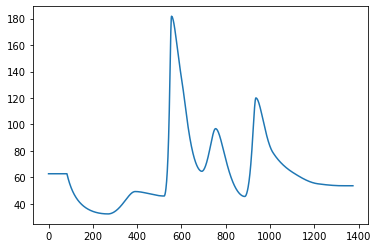

In [56]:

hr1=np.mean(hr(dat))
hr_data=hr(dat)
plt.plot(hr_data)
print("Heart rate is",hr1,"bpm")

In [57]:
i=input("Enter id")
name=input("enter name")
age=input("enter age")

Enter id4
enter nameyashaswini
enter age21


In [18]:
import pandas as pd
d5=pd.DataFrame(columns=["id","name","age","hr","rf_bp","dnn_bp"])
# d2.columns=["id","name","age","hr","bp"]
# d2

In [58]:
# list=[i,name,age,hr1,np.mean(result)]
# d2.loc[len(d1)] = list
# d2
new_row={'id':i,"name":name,"age":age,"hr":hr1,"rf_bp":np.mean(result),"dnn_bp":result1}
d5=d5.append(new_row,ignore_index=True)
d5

,id,name,age,hr,rf_bp,dnn_bp
0,0,stv,45,91.972108,82.959243,84.231728
1,1,sushma u,21,53.083380,82.959243,102.432663
2,1,sushma u,21,53.083380,94.725057,102.432663
3,2,vachana,21,71.502835,84.539523,99.258636
4,3,smitha,21,71.352946,84.887083,88.678383
5,4,yashaswini,21,64.358949,87.201211,89.794395
